In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from pysr import PySRRegressor
import matplotlib.pyplot as plt


In [109]:
df_cf = pd.read_csv(r"C:\Users\chidi\Downloads\20240221_SWE_VDC_6.csv")

In [82]:
df_val = pd.read_csv(r"C:\Users\chidi\Downloads\20240221_SWE_VDC_9.csv")

In [6]:
X_cf_val = df_val[['BrakingTime_2', 'disc_heating_BTM_FL', 'POS_MEASUREREV', 'TMC_filtered']]

In [7]:
y_cf_val = df_val['CF_FL']

In [110]:
X_cf = df_cf[['BrakingTime_2', 'Lookup_Table', 'POS_MEASUREREV', 'TMC_filtered']]

In [111]:
y = df_cf['CF_FL']

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from pysr import PySRRegressor

In [27]:
from pysr import PySRRegressor

# Define the symbolic regression model with constraints
model = PySRRegressor(
    niterations=20,  # Number of iterations (adjust as necessary)
    
    # List of binary operators (two inputs)
    binary_operators=[
        "+",    # Addition
        "-",    # Subtraction
        "*",    # Multiplication
        "/",    # Division
        "^",    # Power
    ],
    
    # List of unary operators (one input)
    unary_operators=[
        "exp",      # Exponential function (e^x)
        "log",      # Natural logarithm (ln(x))
        "sqrt",     # Square root
    ],
    
    # Model selection criteria
    model_selection='accuracy',  # Use accuracy for model selection
    population_size=50,         # Population size for evolutionary search
    crossover_probability=0.9,   # Probability of crossover
    optimize_probability=0.5,    # Probability of optimization
    verbosity=3,                 # Verbosity level
    batching=True,               # Enable batching
    parsimony = 1e-2,            # Penalize complexity
    maxsize=20,                  # Maximum complexity of equations
    
    # Constraints
    constraints={
        "unary": 1,  # Each unary operator can occur only once per variable
        "nesting": 4,  # No more than one level of nesting
    },
    
)


In [130]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=1500,
    binary_operators=["+", "-", "*", "/", "^"],  # No trigonometric operators
    unary_operators=["sqrt", "log", "exp"],  # Only basic unary operators
    nested_constraints={
        "sqrt": {"sqrt": 0, "log": 1, "exp": 0},
        "log": {"sqrt": 1, "log": 0, "exp": 1},
        "exp": {"sqrt": 0, "log": 1, "exp": 0},
        "+": {"+": 0, "-": 1, "*": 2, "/": 2, "^": 1},
        "-": {"+": 1, "-": 0, "*": 2, "/": 1, "^": 1},
        "*": {"+": 1, "-": 1, "*": 1, "/": 1, "^": 1},
        "/": {"+": 1, "-": 1, "*": 2, "/": 0, "^": 2},
        "^": {"+": 1, "-": 1, "*": 2, "/": 1, "^": 0},
    },
    model_selection='accuracy',  # Use accuracy for model selection
    populations=20,               # Population size for evolutionary trees
    population_size=100,         # Population size for evolutionary generation search
    ncycles_per_iteration=50,  # Number of cycles per iteration
    crossover_probability=0.7,   # Probability of crossover
    optimize_probability=0.9,    # Probability of optimization
    verbosity=3,                 # Verbosity level
    complexity_of_constants=1,   # Maximum complexity of constants
    complexity_of_variables=1,  # Maximum complexity of variables
    batching=True,               # Enable batching
    parsimony = 1e-4,            # Penalize complexity
    precision=64,                # Use 64-bit precision
    elementwise_loss="LPDistLoss{1}()", # Use L1 loss
    maxsize=25,                  # Maximum complexity of equations
    maxdepth=13,                # Maximum depth of equations
)


In [131]:
model.fit(X_cf, y)

C:\Users\chidi\anaconda3\envs\codespace\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
C:\Users\chidi\anaconda3\envs\codespace\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\chidi\anaconda3\envs\codespace\lib\site-packages\pysr\sr.py:73: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 3.420e+03
Head worker occupation: 78.3%. This is high, and will prevent efficient resource usage. Increase `ncycles_per_iteration` to reduce load on head worker.
Progress: 34 / 30000 total iterations (0.113%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           3.668e+02  1.802e+01  y = exp(3.6376)
3           6.112e+01  1.792e+00  y = TMC_filtered / 0.29648
5           2.743e+01  4.006e-01  y = (11.297 + TMC_filtered) / 0.29732
11          2.736e+01  3.811e-04  y = ((3.357 * TMC_filtered) + exp(3.6662)) - (exp(-0.31253) ^ ...
                                  -0.31253)
12          2.675e+01  2.277e-02  y = (((2.2264 * (2.2264 * 2.2264)) + TMC_filtered) - sqrt(TMC_...
                                  filtered)) / 0.29049
14          2.675e+01  2.811e-06  y = (((2.2265 * (log(exp(2.2265)) * 2.2265)) + TMC_filtered) -...
                  

PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                       Lookup_Table   
	1         4.061650e-01                   TMC_filtered ^ 1.157318158096124   
	2         1.717759e-11             sqrt(TMC_filtered ^ 2.314636316412644)   
	3         8.579819e-01         38.0 + (TMC_filtered ^ 1.1560557770965938)   
	4         3.734579e-02  sqrt((TMC_filtered ^ 2.314633228922798) + 1444...   
	5         9.464825e-03  sqrt((TMC_filtered ^ 2.314636316399559) + 3896...   
	6         3.087619e-02  (38.99999999999972 + (TMC_filtered ^ 1.1618415...   
	7         2.301892e-01  (38.0 + (4.249086780953242 * TMC_filtered)) - ...   
	8         1.573985e-02  (38.0 + (3.509015491634375 * TMC_filtered)) - ...   
	9         1.664940e-03  (38.0 + (3.506585465968935 * TMC_filtered)) - ...   
	10        1.742743e-01  (38.0 + (3.3628839910086157 * TMC_filtered)) -...   
	11        2.725594e-02  (38.0 + (3.3628845380721217 * TMC_filtered)) -...   
	12        3.487536e-04  (38.0 + (3.3571720739984316 * TMC_filtered)) -...   
	13        1.671406e-02  (38.0 + (TMC_filtered * 3.3570875531097615)) -...   
	14        3.424489e-03  (38.0 + (3.3570875531097615 * TMC_filtered)) -...   
	15        8.749172e-04  (38.0 + (3.3570875531097615 * TMC_filtered)) -...   
	16  >>>>  6.055522e-05  (38.0 + (3.3570875531097615 * TMC_filtered)) -...   
	
	          loss  complexity  
	0   132.327800           1  
	1    58.730087           3  
	2    58.730087           4  
	3    24.902552           5  
	4    23.989698           6  
	5    23.539853           8  
	6    22.824138           9  
	7    18.131114          10  
	8    17.569242          12  
	9    17.540015          13  
	10   14.734777          14  
	11   13.953057          16  
	12   13.943328          18  
	13   13.712215          19  
	14   13.618621          21  
	15   13.594812          23  
	16   13.593165          25  
]

In [132]:
eq10 = model.sympy()

In [133]:
eq10

3.3570875531097615*TMC_filtered - (3.4251014761349783*BrakingTime_2 + 3.4251014761349783*TMC_filtered)*exp(-3.6423113237370706e-6*TMC_filtered)**(sqrt(BrakingTime_2)*(TMC_filtered - 2.743033633511501)) + 38.0

In [134]:
CF_pred_10 = model.predict(X_cf)

C:\Users\chidi\anaconda3\envs\codespace\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [135]:
CF_pred_10

array([38., 38., 38., ..., 38., 38., 38.])

In [136]:
# Create a DataFrame
df_pred10 = pd.DataFrame({
    'real CF': y,
    'CF_pred10': CF_pred_10
})

In [137]:
df_pred10.iloc[807:3100]

,real CF,CF_pred10
807,38.0,38.000000
808,38.0,38.000000
809,38.0,38.000000
810,38.0,38.000000
811,38.0,38.000000
...,...,...
3095,4388.0,5062.349278
3096,3260.0,3987.390227
3097,1649.0,2256.236294
3098,521.0,1297.438301


In [140]:
calculate_metrics(df_pred10)

{'MSE': np.float64(5737.015132951898),
 'MRSE': np.float64(75.743086370651),
 'R-squared': np.float64(0.9977394548720843)}

<Axes: title={'center': 'Real vs Predicted CF'}, xlabel='Index', ylabel='CF'>

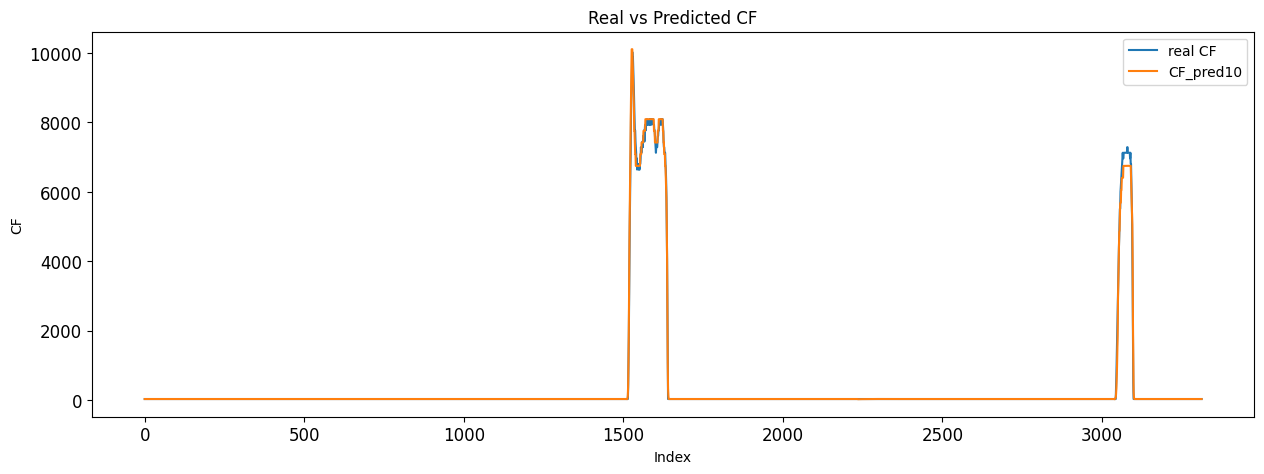

In [141]:
df_pred10.iloc[0:6000].plot(figsize=(15, 5), title='Real vs Predicted CF', xlabel='Index', ylabel='CF', fontsize=12)

<Axes: title={'center': 'Real vs Predicted CF'}, xlabel='Index', ylabel='CF'>

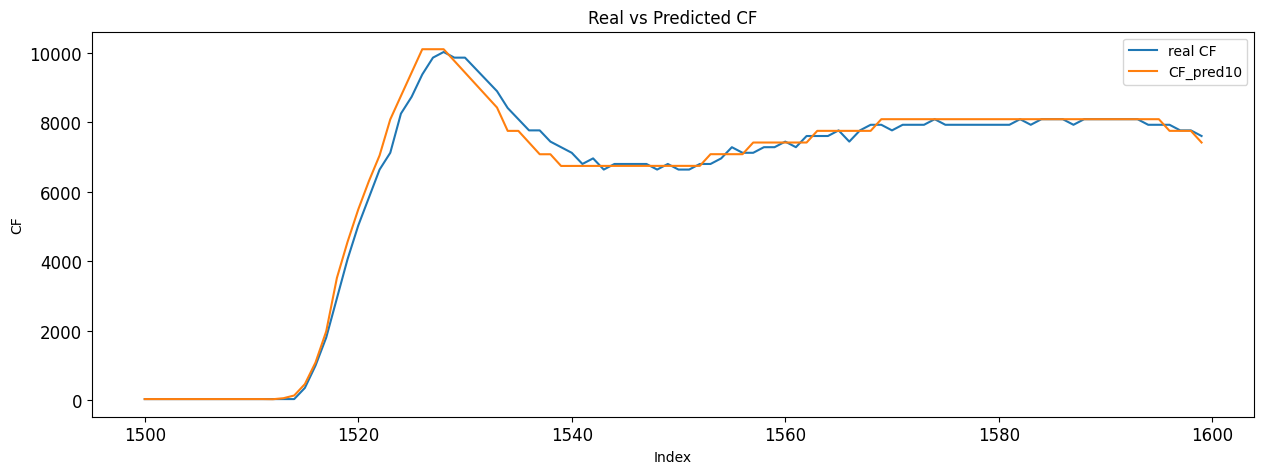

In [142]:
df_pred10.iloc[1500:1600].plot(figsize=(15, 5), title='Real vs Predicted CF', xlabel='Index', ylabel='CF', fontsize=12)

In [47]:
# validation of equation 5
CF_pred_val_5 = model.predict(X_cf_val)

C:\Users\chidi\anaconda3\envs\codespace\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [48]:
CF_pred_val_5

array([-4.98055675e+11, -4.89558139e+11, -4.81600073e+11, ...,
       -4.81600073e+11, -4.89558139e+11, -4.89558139e+11])

In [50]:
# Create a DataFrame
df_pred_val5 = pd.DataFrame({
    'real CF': y_cf_val,
    'CF_pred5': CF_pred_val_5
})

In [51]:
df_pred_val5

,real CF,CF_pred5
0,151.0,-4.980557e+11
1,151.0,-4.895581e+11
2,151.0,-4.816001e+11
3,151.0,-4.895581e+11
4,151.0,-4.980557e+11
...,...,...
6380,139.0,-4.980557e+11
6381,139.0,-4.816001e+11
6382,139.0,-4.816001e+11
6383,139.0,-4.895581e+11


In [18]:
CF_pred_1 = model.predict(X_cf)

C:\Users\chidi\anaconda3\envs\codespace\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [19]:
CF_pred_1

array([38., 38., 38., ..., 38., 38., 38.])

In [25]:
# Create a DataFrame
df_pred1 = pd.DataFrame({
    'real CF': y,
    'CF_pred1': CF_pred_1
})

In [31]:
df_pred1.iloc[950:1200]

,real CF,CF_pred1
950,38.0,38.000000
951,38.0,38.000000
952,38.0,38.000000
953,38.0,38.000000
954,38.0,38.000000
...,...,...
1195,6645.0,6449.619718
1196,6806.0,6449.619718
1197,6645.0,6449.619718
1198,6806.0,6706.084507


In [20]:
def calculate_metrics(df):
    """
    Calculate MSE, MRSE, and R-squared from a DataFrame.
    
    Parameters:
        df (pd.DataFrame): A DataFrame where:
                          - The first column contains true values.
                          - The second column contains predicted values.
                          
    Returns:
        dict: A dictionary with MSE, MRSE, and R-squared.
    """
    # Ensure the DataFrame has at least two columns
    if df.shape[1] < 2:
        raise ValueError("DataFrame must have at least two columns: true and predicted values.")
    
    # Extract true and predicted values
    true_values = df.iloc[:, 0]
    predicted_values = df.iloc[:, 1]
    
    # Calculate MSE
    mse = np.mean((true_values - predicted_values) ** 2)
    
    # Calculate MRSE
    mrse = np.sqrt(mse)
    
    # Calculate R-squared
    ss_total = np.sum((true_values - true_values.mean()) ** 2)
    ss_residual = np.sum((true_values - predicted_values) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    
    # Return the results
    return {
        "MSE": mse,
        "MRSE": mrse,
        "R-squared": r_squared
    }


In [35]:
calculate_metrics(df_pred1)

{'MSE': np.float64(22439.187223532015),
 'MRSE': np.float64(149.7971535895526),
 'R-squared': np.float64(0.9995598951469002)}

<Axes: title={'center': 'Real vs Predicted CF'}, xlabel='Index', ylabel='CF'>

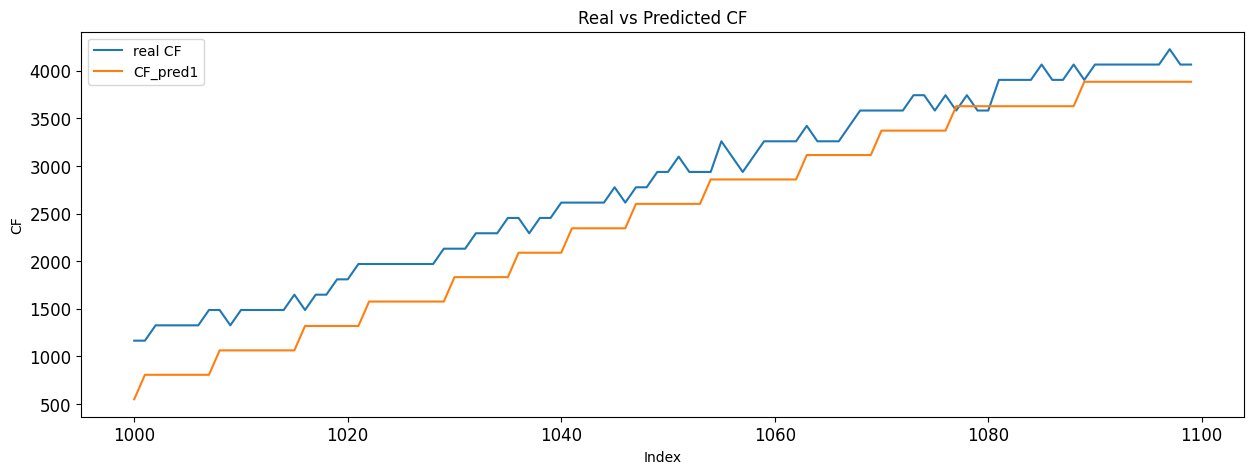

In [41]:
df_pred1.iloc[1000:1100].plot(figsize=(15, 5), title='Real vs Predicted CF', xlabel='Index', ylabel='CF', fontsize=12)

In [21]:
pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.8 MB 3.4 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/7.8 MB 3.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 2.9 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/7.8 MB 2.7 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/7.8 MB 2.9 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/7.8 MB 3.2 MB/s eta 0:00:02
   ------------------------------ --------- 6.0/7.8 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.9 MB/s eta 0:00:00
Note: you may need to rest

In [22]:
import matplotlib.pyplot as plt

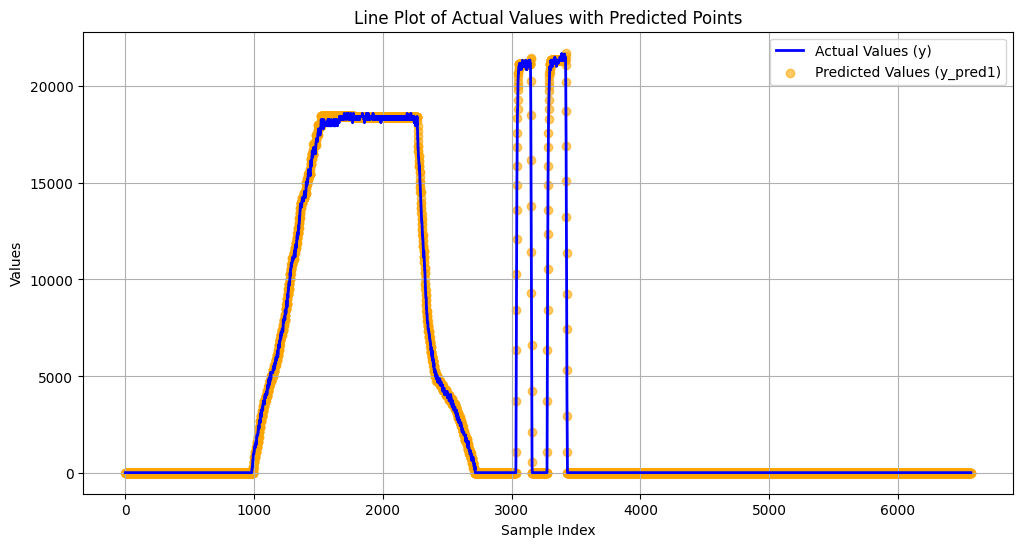

In [79]:
# Line plot with data points on each index of the sample data

plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual Values (y)', color='blue', linewidth=2)
plt.scatter(range(len(y)), CF_pred_7, label='Predicted Values (y_pred1)', color='orange', alpha=0.6)
plt.title('Line Plot of Actual Values with Predicted Points')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

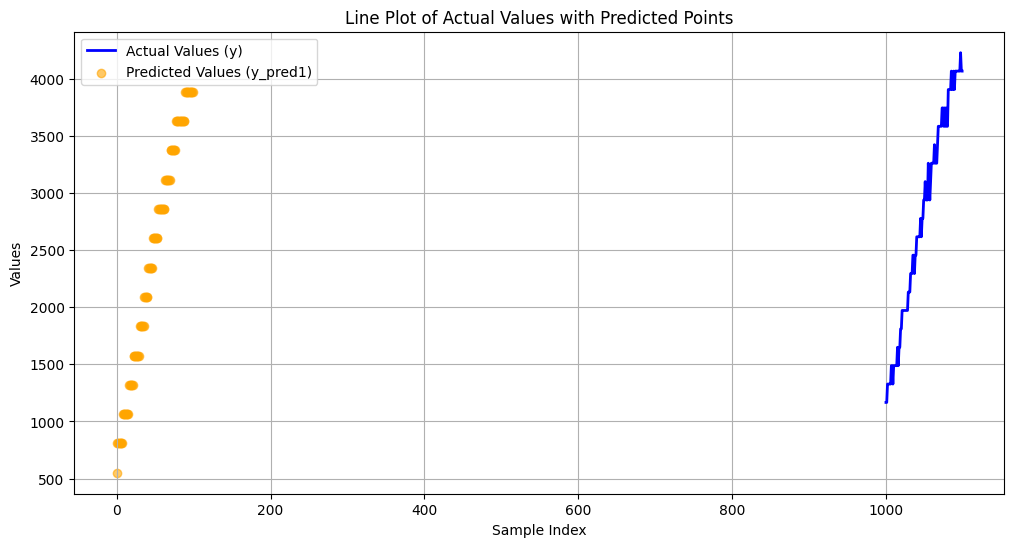

In [24]:
# Line plot with data points on each index of the sample data

plt.figure(figsize=(12, 6))
plt.plot(y[1000:1100], label='Actual Values (y)', color='blue', linewidth=2)
plt.scatter(range(len(y[1000:1100])), CF_pred_1[1000:1100], label='Predicted Values (y_pred1)', color='orange', alpha=0.6)
plt.title('Line Plot of Actual Values with Predicted Points')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

In [2]:
pip install -U pysr

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pytorch_lightning

   ---------------------------------------- 0.0/819.3 kB ? eta -:--:--
   --------------------------------------- 819.3/819.3 kB 11.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
    --------------------------------------- 3.7/203.0 MB 16.8 MB/s eta 0:00:12
   - -------------------------------------- 8.1/203.0 MB 19.4 MB/s eta 0:00:11
   -- ------------------------------------- 12.6/203.0 MB 20.2 MB/s eta 0:00:10
   --- ------------------------------------ 17.6/203.0 MB 21.3 MB/s eta 0:00:09
   ---- ----------------------------------- 22.3/203.0 MB 21.4 MB/s eta 0:00:09
   ----- ---------------------------------- 27.0/203.0 MB 21.7 MB/s eta 0:00:09
   ------ --------------------------------- 32.5/203.0 MB 22.4 MB/s eta 0:00:08
   ------- -------------------------------- 38.0/203.0 MB 23.0 MB/s eta 0:00:08
   -------- ------------------------------- 43.3/203.0 MB 23.3 MB/s eta 0:00:07
   --------- ------------------------------ 48.0/203.0 MB 23

In [9]:
pip install torch==1.10.0+cu113 torchvision==0.11.1+cu113 torchaudio==0.10.0 -f https://download.pytorch.org/whl/torch_stable.html


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-lightning 2.5.0.post0 requires torch>=2.1.0, but you have torch 1.10.0+cu113 which is incompatible.
torchmetrics 1.6.1 requires torch>=2.0.0, but you have torch 1.10.0+cu113 which is incompatible.


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 GB 2.8 MB/s eta 0:14:36
     ---------------------------------------- 0.0/2.4 GB 7.3 MB/s eta 0:05:35
     ---------------------------------------- 0.0/2.4 GB 14.9 MB/s eta 0:02:44
     ---------------------------------------- 0.0/2.4 GB 17.5 MB/s eta 0:02:20
     ---------------------------------------- 0.0/2.4 GB 19.4 MB/s eta 0:02:05
     ---------------------------------------- 0.0/2.4 GB 20.5 MB/s eta 0:01:58
     ---------------------------------------- 0.0/2.4 GB 21.1 MB/s eta 0:01:55
      --------------------------------------- 0.0/2.4 GB 22.0 MB/s eta 0:01:50
      --------------------------------------- 0.0/2.4 GB 22.3 MB/s eta 0:01:48
      --------------------------------------- 0.0/2.4 GB 22.8 MB/s eta 0:01:46
 

In [11]:
import torch
print(torch.cuda.is_available())


False


In [2]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, TensorDataset
import pytorch_lightning as pl
from sklearn.model_selection import train_test_split
import numpy as np
from pysr import PySRRegressor
import pickle as pkl

# Load your dataset (replace with the actual path to your file)
import pandas as pd
# Load the dataset
file_path = "C:/Users/chidi/Downloads/clamping_force_try2.csv"
data = pd.read_csv(file_path)

# Extract features and target
X = data[['BrakingTime_2', 'disc_heating_BTM_FL', 'POS_MEASUREREV', 'TMC_filtered']].values
z = data['CF_FL'].values

# Hyperparameters
hidden = 128
total_steps = 50_000

# Define MLP
def mlp(size_in, size_out, act=nn.ReLU):
    return nn.Sequential(
        nn.Linear(size_in, hidden),
        act(),
        nn.Linear(hidden, hidden),
        act(),
        nn.Linear(hidden, hidden),
        act(),
        nn.Linear(hidden, size_out),
    )

# Define the Model
class SumNet(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.g = mlp(4, 1)  # Adjusted for 4 features
        self.f = mlp(1, 1)

    def forward(self, x):
        y_i = self.g(x)
        y = torch.mean(y_i, dim=1, keepdim=True)  # Averaging across samples
        z = self.f(y)
        return z[:, 0]

    def training_step(self, batch, batch_idx):
        x, z = batch
        predicted_z = self(x)
        loss = F.mse_loss(predicted_z, z)
        return loss

    def validation_step(self, batch, batch_idx):
        return self.training_step(batch, batch_idx)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.max_lr)
        scheduler = {
            "scheduler": torch.optim.lr_scheduler.OneCycleLR(
                optimizer,
                max_lr=self.max_lr,
                total_steps=self.trainer.estimated_stepping_batches,
                final_div_factor=1e4,
            ),
            "interval": "step",
        }
        return [optimizer], [scheduler]


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\chidi\anaconda3\envs\codespace\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\chidi\anaconda3\envs\codespace\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\chidi\anaconda3\envs\codespace\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\chidi\anaconda3\envs\codespace\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
 

ImportError: cannot import name 'LRScheduler' from 'torch.optim.lr_scheduler' (C:\Users\chidi\anaconda3\envs\codespace\lib\site-packages\torch\optim\lr_scheduler.py)

In [5]:
# Prepare the data
Xt = torch.tensor(X).float()
zt = torch.tensor(z).float()
X_train, X_test, z_train, z_test = train_test_split(Xt, zt, random_state=0)
train_set = TensorDataset(X_train, z_train)
train = DataLoader(train_set, batch_size=128, num_workers=4, shuffle=True, pin_memory=True)
test_set = TensorDataset(X_test, z_test)
test = DataLoader(test_set, batch_size=256, num_workers=4, pin_memory=True)


In [7]:
# Train the model
pl.seed_everything(0)
model = SumNet()
model.total_steps = total_steps
model.max_lr = 1e-2
trainer = pl.Trainer(max_steps=total_steps, accelerator="gpu", devices=1)


Seed set to 0


MisconfigurationException: No supported gpu backend found!